## R34 final data creation
I follow this steps to creat the final data

1. Load the right participant IDs
2. Filter all of the relevant tables based on the finalized participant IDs
3. Calculate the psychometrics for all of the finalized participants
4. Create a dataframe that includes all of the score for the finalized participants

In [12]:
## Loading packages
import pandas as pd
import numpy as np
import os
from os import walk
import glob
import sklearn
from sklearn import impute
import missingno as msno
import math

### 1. Get the right Participants IDs
#### Steps:
1. Adding Test indicator column in the ID_note Table
2. Get the current analysis IDs
3. Exclude test account from current analysis IDs #13
4. Add new participants from the private server #36
5. Add 50 participants 
    * add 32 participants with no compare and contrast data
    * add two participant with strange birth year
    * add two participant with not having RR data
    * add 14 participant with no explaination

**THE NUMBER OF FINAL ELIGIBLE PARTICIPANT IDS IS: _810_ **



In [8]:
print("--------------------------------Section 1-----------------------------------------------")
print("----------------------------------------------------------------------------------------")
print("----------------------------------------------------------------------------------------")
print("-----------------The number of ID that has been excluded in each step-------------------")
print("----------------------------------------------------------------------------------------")
dataID = pd.read_csv("/Users/soniabaee/Documents/Projects/MindTrails/R34/consortDiagram/notes.csv")
dataID.rename(columns = {'final4$participantID':'CL', 
                         'Julie_participants$participantID':'SB', 
                         'notes':'notes'}, inplace = True) 
# Adding Test Account column in this data
dataID['test'] = np.where(dataID.notes.str.contains('Test'),1, 0)

print("")
# current analysis IDs
current_analysisIDs = list(dataID[(np.logical_not(dataID.SB.isnull()))]['participantID']) #737
print('Number of participants in the current analysis: {}!'.format(len(current_analysisIDs)))
print("-------------------------------------------------------------------------------")
# exclude test account from current analysis IDs #13
test_account_ID_in_current_analysis = list(dataID[(np.logical_not(dataID.SB.isnull())) 
                                                  & (dataID.test == 1)]['participantID'])
print('Number of test participants in the current analysis: {}!'.format(len(test_account_ID_in_current_analysis)))

update_analysis_IDs = set(current_analysisIDs) - set(test_account_ID_in_current_analysis)
analysisIDs = update_analysis_IDs.copy()
print('Number of participants after excluding test account is: {}!'.format(len(analysisIDs)))
print("-------------------------------------------------------------------------------")

# # add new participants from the private server #36
private_server_IDs = list(dataID[((dataID.SB).isnull()) 
                                 & (dataID.notes == 'Not included in original dataset due to server error')]['participantID'])
print('Number of participants in the private server is: {}!'.format(len(private_server_IDs)))
analysisIDs.update(private_server_IDs)
print('Number of participants after adding the private server participants is: {}!'.format(len(analysisIDs)))

print("-------------------------------------------------------------------------------")
# add 50 participants 
# add 32 participants with no compare and contrast data
no_compare_contrast_Ids_string = list(['1073', '1102', '1161', '1218', '1254', '1335',  '1353', '1409', 
                                       '1420', '1455', '1514', '1538', '1649', '1715', '1744', '1779', '1789', 
                                       '1820', '1826', '1871', '474', '638', '649', '650', '685', '694', '750', 
                                       '809', '822', '986', '987', '999'])
no_compare_contrast_Ids = set(list(map(int, no_compare_contrast_Ids_string)))
print('Number of participants with no compare and contrast data is: {}!'.format(len(no_compare_contrast_Ids)))
analysisIDs.update(no_compare_contrast_Ids)
print('Number of participants after adding the compare and contrast participants is: {}!'.format(len(analysisIDs)))
print("-------------------------------------------------------------------------------")
# add two participant with strange birth year
strange_birth_year_Ids = set([640, 1344])
print('Number of participants with strange birth year is: {}!'.format(len(strange_birth_year_Ids)))
analysisIDs.update(strange_birth_year_Ids)
print('Number of participants after adding the strange birth year participants is: {}!'.format(len(analysisIDs)))

print("-------------------------------------------------------------------------------")
# add two participant with not having RR data
no_RR_data = set([481, 581])
print('Number of participants with no RR data is: {}!'.format(len(no_RR_data)))
analysisIDs.update(no_RR_data)
print('Number of participants after adding no RR participants is: {}!'.format(len(analysisIDs)))

print("-------------------------------------------------------------------------------")
# add 14 participant with no explaination
no_explaination_Ids_string = list(['1633', '1190', '1748', '1792', '1052', '733', '970', '1413', '1833', 
                            '766', '855', '894', '735', '620'])
no_explaination_Ids = set(list(map(int, no_explaination_Ids_string)))
print('Number of participants with no explaination data is: {}!'.format(len(no_explaination_Ids)))
analysisIDs.update(no_explaination_Ids)
print('Number of participants after adding with no explaination participants is: {}!'.format(len(analysisIDs)))

print("-------------------------------------------------------------------------------")
# the final participant ID's 
print('Final number of participant is: {}!'.format(len(analysisIDs)))

# some tables the type of the value is string and we cannot convert to int like dass_as table
analysisIDs_string = [str(e) for e in analysisIDs]

--------------------------------Section 1-----------------------------------------------
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
-----------------The number of ID that has been excluded in each step-------------------
----------------------------------------------------------------------------------------

Number of participants in the current analysis: 737!
-------------------------------------------------------------------------------
Number of test participants in the current analysis: 13!
Number of participants after excluding test account is: 724!
-------------------------------------------------------------------------------
Number of participants in the private server is: 36!
Number of participants after adding the private server participants is: 760!
-------------------------------------------------------------------------------
Number of par

### 2. Filter all of the relevant tables based on the finalized participant IDs

#### 2.1 Load the most up to dated data
1. participant
2. demographic
3. dass21_as
4. dass21_ds
5. tasklog
6. OASIS
7. RR
8. BBSIQ

In [9]:
print("--------------------------------Section 2.1---------------------------------------------")
print("----------------------------------------------------------------------------------------")
print("----------------------------------------------------------------------------------------")
print("--------------------Showing the number of unique IDs in each table----------------------")
print("----------------------------------------------------------------------------------------")

# insert the data folder directory
directoryPath = "/Users/soniabaee/Documents/Projects/MindTrails/R34/consortDiagram/ManagingAnxiety_final-2/Raw Data"
os.chdir(directoryPath)
tableNames = []
for (dirpath, dirnames, filenames) in walk(directoryPath):
    for file in filenames:
        if file.endswith(".csv"):
            tableNames.append(file)

print("")
participantFileName = [s for s in tableNames if "participant" in s.lower()]
participant = pd.read_csv(participantFileName[0])
print('Number of unique participants in {} table is: {}'.format(participantFileName, len(participant.id.unique())))

print("-------------------------------------------------------------------------------")
demographicsFileName = [s for s in tableNames if "demographic" in s.lower()]
demographics = pd.read_csv(demographicsFileName[0])
print('Number of unique participants in {} table is: {}'.format(demographicsFileName, len(demographics.participantRSA.unique())))

print("-------------------------------------------------------------------------------")
dass_asFileName = [s for s in tableNames if "dass21_as" in s.lower()]
dass_as = pd.read_csv(dass_asFileName[0])
print('Number of unique participants in {} table is: {}'.format(dass_asFileName, len(dass_as.participantDAO.unique())))

print("-------------------------------------------------------------------------------")
dass_dsFileName = [s for s in tableNames if "dass21_ds" in s.lower()]
dass_ds = pd.read_csv(dass_dsFileName[0])
print('Number of unique participants in {} table is: {}'.format(dass_dsFileName, len(dass_ds.participantRSA.unique())))

print("-------------------------------------------------------------------------------")
tasklogFileName = [s for s in tableNames if "tasklog" in s.lower()]
tasklog = pd.read_csv(tasklogFileName[0])
print('Number of unique participants in {} table is: {}'.format(tasklogFileName, len(tasklog.participantdao_id.unique())))

print("-------------------------------------------------------------------------------")
oasisFileName = [s for s in tableNames if "oa" in s.lower()]
oasis = pd.read_csv(oasisFileName[0])
print('Number of unique participants in {} table is: {}'.format(oasisFileName, len(oasis.participantDAO.unique())))

print("-------------------------------------------------------------------------------")
rrFileName = [s for s in tableNames if "rr" in s.lower()]
rr = pd.read_csv(rrFileName[0])
print('Number of unique participants in {} table is: {}'.format(rrFileName, len(rr.participantRSA.unique())))

print("-------------------------------------------------------------------------------")
bbsiqFileName = [s for s in tableNames if "bbsiq" in s.lower()]
bbsiq = pd.read_csv(bbsiqFileName[0])
print('Number of unique participants in {} table is: {}'.format(bbsiqFileName, len(bbsiq.participantRSA.unique())))
print("-------------------------------------------------------------------------------")


--------------------------------Section 2-----------------------------------------------
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
--------------------Showing the number of unique IDs in each table----------------------
----------------------------------------------------------------------------------------

Number of unique participants in ['ParticipantExport_recovered_Feb_02_2019.csv'] table is: 1971
-------------------------------------------------------------------------------
Number of unique participants in ['Demographic_recovered_Feb_02_2019.csv'] table is: 1741
-------------------------------------------------------------------------------
Number of unique participants in ['DASS21_AS_recovered_Feb_02_2019.csv'] table is: 1865
-------------------------------------------------------------------------------
Number of unique participants in ['DASS2

#### 2.2 Filter data based on the eligible participants

In [7]:
print("--------------------------------Section 2.2---------------------------------------------")
print("----------------------------------------------------------------------------------------")
print("----------------------------------------------------------------------------------------")
print("-----------------Filter each table based on the right participant IDs-------------------")
print("----------------------------------------------------------------------------------------")

print("")
participant_analysis = participant[participant.id.isin(analysisIDs)].reset_index(drop = True)
print('Number of unique participants in {} table is: {} '.format(participantFileName, len(participant_analysis.id.unique())), end='-')
print(' Excluded is: {}'.format(len(participant.id.unique()) - len(participant_analysis.id.unique())))

print("-------------------------------------------------------------------------------")
demographics_analysis = demographics[demographics.participantRSA.isin(analysisIDs_string)].reset_index(drop = True)
print('Number of unique participants in {} table is: {} '.format(demographicsFileName, len(demographics_analysis.participantRSA.unique())), end='-')
print(' Excluded is: {}'.format(len(demographics.participantRSA.unique()) - len(demographics_analysis.participantRSA.unique())))

print("-------------------------------------------------------------------------------")
dass_as_analysis = dass_as[dass_as.participantDAO.isin(analysisIDs_string)].reset_index(drop = True)
print('Number of unique participants in {} table is: {} '.format(dass_asFileName, len(dass_as_analysis.participantDAO.unique())), end='-')
print(' Excluded is: {}'.format(len(dass_as.participantDAO.unique()) - len(dass_as_analysis.participantDAO.unique())))

print("-------------------------------------------------------------------------------")
dass_ds_analysis = dass_ds[dass_ds.participantRSA.isin(analysisIDs_string)].reset_index(drop = True)
print('Number of unique participants in {} table is: {} '.format(dass_dsFileName, len(dass_ds_analysis.participantRSA.unique())), end='-')
print(' Excluded is: {}'.format(len(dass_ds.participantRSA.unique()) - len(dass_ds_analysis.participantRSA.unique())))

print("-------------------------------------------------------------------------------")
tasklog_analysis = tasklog[tasklog.participantdao_id.isin(analysisIDs)].reset_index(drop = True)
print('Number of unique participants in {} table is: {} '.format(tasklogFileName, len(tasklog_analysis.participantdao_id.unique())), end='-')
print(' Excluded is: {}'.format(len(tasklog.participantdao_id.unique()) - len(tasklog_analysis.participantdao_id.unique())))

print("-------------------------------------------------------------------------------")
oasis_analysis = oasis[oasis.participantDAO.isin(analysisIDs)].reset_index(drop = True)
print('Number of unique participants in {} table is: {} '.format(oasisFileName, len(oasis_analysis.participantDAO.unique())), end='-')
print(' Excluded is: {}'.format(len(oasis.participantDAO.unique()) - len(oasis_analysis.participantDAO.unique())))

print("-------------------------------------------------------------------------------")
rr_analysis = rr[rr.participantRSA.isin(analysisIDs_string)].reset_index(drop = True)
print('Number of unique participants in {} table is: {} '.format(rrFileName, len(rr_analysis.participantRSA.unique())), end='-')
print(' Excluded is: {}'.format(len(rr.participantRSA.unique()) - len(rr_analysis.participantRSA.unique())))

print("-------------------------------------------------------------------------------")
bbsiq_analysis = bbsiq[bbsiq.participantRSA.isin(analysisIDs_string)].reset_index(drop = True)
print('Number of unique participants in {} table is: {} '.format(bbsiqFileName, len(bbsiq_analysis.participantRSA.unique())), end='-')
print(' Excluded is: {}'.format(len(bbsiq_analysis.participantRSA.unique()) - len(bbsiq_analysis.participantRSA.unique())))
print("-------------------------------------------------------------------------------")

--------------------------------Section 3-----------------------------------------------
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
-----------------Filter each table based on the right participant IDs-------------------
----------------------------------------------------------------------------------------

Number of unique participants in ['ParticipantExport_recovered_Feb_02_2019.csv'] table is: 810 - Excluded is: 1161
-------------------------------------------------------------------------------
Number of unique participants in ['Demographic_recovered_Feb_02_2019.csv'] table is: 810 - Excluded is: 931
-------------------------------------------------------------------------------
Number of unique participants in ['DASS21_AS_recovered_Feb_02_2019.csv'] table is: 810 - Excluded is: 1055
----------------------------------------------------------------

#### 2.3 have a same column name for the participant ID and convert their types to int

In [10]:
print("--------------------------------Section 2.3---------------------------------------------")
print("----------------------------------------------------------------------------------------")
print("----------------------------------------------------------------------------------------")
print("--------------Have a same name for the participant ID column in all tables--------------")
print("----------------------------------------------------------------------------------------")


standard_id_name = 'participantID'

participant_analysis.rename(columns = {'id': standard_id_name}, inplace = True)
participant_analysis['participantID'] = participant_analysis.participantID.astype(str).astype(int)

demographics_analysis.rename(columns = {'participantRSA': standard_id_name}, inplace = True)
demographics_analysis['participantID'] = demographics_analysis.participantID.astype(str).astype(int)

dass_as_analysis.rename(columns = {'participantDAO': standard_id_name}, inplace = True)
dass_as_analysis['participantID'] = dass_as_analysis.participantID.astype(str).astype(int)

dass_ds_analysis.rename(columns = {'participantRSA': standard_id_name}, inplace = True)
dass_ds_analysis['participantID'] = dass_ds_analysis.participantID.astype(str).astype(int)

tasklog_analysis.rename(columns = {'participantdao_id': standard_id_name}, inplace = True)
tasklog_analysis['participantID'] = tasklog_analysis.participantID.astype(str).astype(int)

oasis_analysis.rename(columns = {'participantDAO': standard_id_name}, inplace = True)
oasis_analysis['participantID'] = oasis_analysis.participantID.astype(str).astype(int)

rr_analysis.rename(columns = {'participantRSA': standard_id_name}, inplace = True)
rr_analysis['participantID'] = rr_analysis.participantID.astype(str).astype(int)
bbsiq_analysis.rename(columns = {'participantRSA': standard_id_name}, inplace = True)
bbsiq_analysis['participantID'] = bbsiq_analysis.participantID.astype(str).astype(int)

--------------------------------Section 2.3---------------------------------------------
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
--------------Have a same name for the participant ID column in all tables--------------
----------------------------------------------------------------------------------------


### 3. Calculate the psychometrics

#### 3.1 Calculate Dass_AS score 
1. dass_as_score = 2*sum(['breathing', 'dryness', 'heart', 'panic', 'scared', 'trembling', 'worry'])

In [14]:
print("--------------------------------Section 3.1---------------------------------------------")
print("----------------------------------------------------------------------------------------")
print("----------------------------------------------------------------------------------------")
print("----------------------------Calculate DASS_AS psychometrics-----------------------------")
print("----------------------------------------------------------------------------------------")
print("")
## Get the latest entry for each participant
dass_as_analysis = dass_as_analysis.sort_values(by="date").groupby(['participantID','session']).tail(1)

# one user has a specific issue and value -2, we replace that value with -1
dass_specific_issue = pd.DataFrame(dass_as_analysis.isin([-2]).any()).reset_index(drop = False).rename(columns = {0: 'indicator', 'index':'colName'})

colname_specific_value = list(dass_specific_issue[dass_specific_issue.indicator == True]['colName'])
if len(colname_specific_value) != 0:
    dass_as_analysis.loc[dass_as_analysis[colname_specific_value[0]] == -2, colname_specific_value[0]] = -1
    dass_as_analysis.loc[dass_as_analysis[colname_specific_value[1]] == -2, colname_specific_value[1]] = -1

# prefer not to answer is -1 so impute with median value
prefer_not_to_answer = -1
dass_as_analysis = dass_as_analysis.replace([prefer_not_to_answer], np.nan)
imputer = sklearn.impute.SimpleImputer(strategy='median')
impute_cols = set(dass_as_analysis.select_dtypes(include='number').columns) - {standard_id_name, 'id'}
for col in impute_cols:
    imputed = imputer.fit_transform(np.array(dass_as_analysis[col]).reshape(-1, 1))
    dass_as_analysis[col] = imputed

# remove meaningless columns
dass_as_analysis_new = dass_as_analysis[dass_as_analysis.columns.drop(['participantRSA', 'id', 'sessionId'])].copy()

#calculate the dass score
dass_as_analysis_new['dass_as_score'] = 2 * dass_as_analysis_new[['breathing', 'dryness', 'heart', 'panic', 'scared', 'trembling', 'worry']].sum(axis = 1)


# convert to wide format
dass_as_analysis_wide = dass_as_analysis_new.pivot(index='participantID', columns='session', values='dass_as_score')

# add a prefix
dass_as_analysis_wide = dass_as_analysis_wide.add_prefix('dass_as_score_')

# adding dropout columns
score_clm = dass_as_analysis_wide.filter(like = "_score", axis = 1).columns
score_clm_dropout = [a + "_dropout" for a in score_clm]
for drop_col in score_clm_dropout:
    col = drop_col.split("_dropout")[0]
    dass_as_analysis_wide[drop_col] = dass_as_analysis_wide[col].apply(lambda x: 0 if math.isnan(x) else 1)

print("Number of unique participants in DASS_AS table {}: ".format(dass_as_analysis_wide.shape[0]))
dass_as_analysis_wide.describe()

--------------------------------Section 3.1---------------------------------------------
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
----------------------------Calculate DASS_AS psychometrics-----------------------------
----------------------------------------------------------------------------------------

Number of unique participants in DASS_AS table 810: 


session,dass_as_score_ELIGIBLE,dass_as_score_POST,dass_as_score_SESSION8,dass_as_score_ELIGIBLE_dropout,dass_as_score_POST_dropout,dass_as_score_SESSION8_dropout
count,801.000000,26.000000,89.000000,810.000000,810.000000,810.000000
mean,23.153558,13.384615,14.516854,0.988889,0.032099,0.109877
std,7.966658,9.596153,9.197470,0.104887,0.176371,0.312929
min,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,6.500000,8.000000,1.000000,0.000000,0.000000
50%,22.000000,12.000000,14.000000,1.000000,0.000000,0.000000
75%,28.000000,17.500000,20.000000,1.000000,0.000000,0.000000
max,42.000000,42.000000,40.000000,1.000000,1.000000,1.000000


#### 3.2 Calculate DASS_DS Score 
1. dass_ds_score = 2 * sum('blue','difficult', 'hopeless', 'meaningless', 'noenthusiastic', 'nopositive', 'noworth')

*** participant 1767 have duplicate value for the session PRE

In [15]:
print("--------------------------------Section 3.2---------------------------------------------")
print("----------------------------------------------------------------------------------------")
print("----------------------------------------------------------------------------------------")
print("----------------------------Calculate DASS_DS psychometrics-----------------------------")
print("----------------------------------------------------------------------------------------")
print("")
## Get the latest entry for each participant
dass_ds_analysis = dass_ds_analysis.sort_values(by="date").groupby(['participantID','session']).tail(1)

# prefer not to answer is -1 so impute with median value
prefer_not_to_answer = -1
dass_ds_analysis = dass_ds_analysis.replace([prefer_not_to_answer], np.nan)
imputer = sklearn.impute.SimpleImputer(strategy='median')
impute_cols = set(dass_ds_analysis.select_dtypes(include='number').columns) - {standard_id_name, 'id'}
for col in impute_cols:
    imputed = imputer.fit_transform(np.array(dass_ds_analysis[col]).reshape(-1, 1))
    dass_ds_analysis[col] = imputed

# remove meaningless columns
dass_ds_analysis_new = dass_ds_analysis[dass_ds_analysis.columns.drop(['Unnamed: 11', 'id'])].copy()

#calculate the dass score
dass_ds_analysis_new['dass_ds_score'] = 2 * dass_ds_analysis_new[['blue','difficult', 'hopeless', 'meaningless', 'noenthusiastic', 'nopositive', 'noworth']].sum(axis = 1)

# convert to wide format
dass_ds_analysis_wide = dass_ds_analysis_new.pivot(index='participantID', columns='session', values='dass_ds_score')

# add a prefix
dass_ds_analysis_wide = dass_ds_analysis_wide.add_prefix('dass_ds_score_')

# adding dropout columns
score_clm = dass_ds_analysis_wide.filter(like = "_score", axis = 1).columns
score_clm_dropout = [a + "_dropout" for a in score_clm]
for drop_col in score_clm_dropout:
    col = drop_col.split("_dropout")[0]
    dass_ds_analysis_wide[drop_col] = dass_ds_analysis_wide[col].apply(lambda x: 0 if math.isnan(x) else 1)

print("Number of unique participants in DASS_DS table {}: ".format(dass_ds_analysis_wide.shape[0]))
dass_ds_analysis_wide.describe()

--------------------------------Section 3.2---------------------------------------------
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
----------------------------Calculate DASS_DS psychometrics-----------------------------
----------------------------------------------------------------------------------------

Number of unique participants in DASS_DS table 762: 


session,dass_ds_score_POST,dass_ds_score_PRE,dass_ds_score_SESSION3,dass_ds_score_SESSION6,dass_ds_score_SESSION8,dass_ds_score_POST_dropout,dass_ds_score_PRE_dropout,dass_ds_score_SESSION3_dropout,dass_ds_score_SESSION6_dropout,dass_ds_score_SESSION8_dropout
count,25.000000,744.000000,205.000000,115.000000,88.000000,762.000000,762.000000,762.000000,762.000000,762.000000
mean,13.920000,21.596774,15.736585,15.304348,14.431818,0.032808,0.976378,0.269029,0.150919,0.115486
std,11.217249,11.100364,10.468856,10.300889,11.738330,0.178252,0.151968,0.443746,0.358205,0.319817
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,12.000000,8.000000,8.000000,5.500000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,12.000000,20.000000,14.000000,14.000000,12.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,24.000000,30.000000,22.000000,20.000000,22.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,34.000000,42.000000,42.000000,42.000000,42.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 3.3 Calculate RR psychometrics
1. Target score: mean of Target/mean of Non-target
    * (Target list: *_NS)
    * (Non target list: *_NF, *_PF, *_PS)
2. Postive_ave_PS = mean of *_PS
3. Negative_ave_NS = mean of *_NS
4. Postive_ave_PF = mean of *_PF
5. Negtive_ave_NF = mean of *_NF

--------------------------------Section 3.3---------------------------------------------
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
----------------------------Calculate RR psychometrics-----------------------------
----------------------------------------------------------------------------------------

Number of unique participants in RR table 764: 


session,negative_nf_score_POST,negative_nf_score_PRE,negative_nf_score_SESSION3,negative_nf_score_SESSION6,negative_nf_score_SESSION8,negative_ns_score_POST,negative_ns_score_PRE,negative_ns_score_SESSION3,negative_ns_score_SESSION6,negative_ns_score_SESSION8,...,positive_pf_score_POST_dropout,positive_pf_score_PRE_dropout,positive_pf_score_SESSION3_dropout,positive_pf_score_SESSION6_dropout,positive_pf_score_SESSION8_dropout,positive_ps_score_POST_dropout,positive_ps_score_PRE_dropout,positive_ps_score_SESSION3_dropout,positive_ps_score_SESSION6_dropout,positive_ps_score_SESSION8_dropout
count,24.000000,748.000000,208.000000,117.000000,86.000000,24.000000,748.000000,208.000000,117.000000,86.000000,...,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000
mean,0.500000,0.603172,0.545339,0.493827,0.465924,1.523148,1.734960,1.570513,1.508208,1.517442,...,0.031414,0.979058,0.272251,0.153141,0.112565,0.031414,0.980366,0.272251,0.153141,0.112565
std,0.530346,0.559090,0.588053,0.540494,0.560167,0.687656,0.590359,0.587246,0.614614,0.580878,...,0.174547,0.143285,0.445410,0.360360,0.316268,0.174547,0.138828,0.445410,0.360360,0.316268
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.111111,0.111111,0.000000,0.000000,0.000000,1.111111,1.333333,1.111111,1.111111,1.111111,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.388889,0.444444,0.333333,0.333333,0.222222,1.611111,1.777778,1.555556,1.555556,1.555556,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.888889,1.000000,0.888889,0.777778,0.666667,1.916667,2.111111,2.000000,1.888889,1.888889,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,2.000000,2.888889,2.444444,2.222222,2.666667,2.777778,3.000000,3.000000,2.888889,2.888889,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


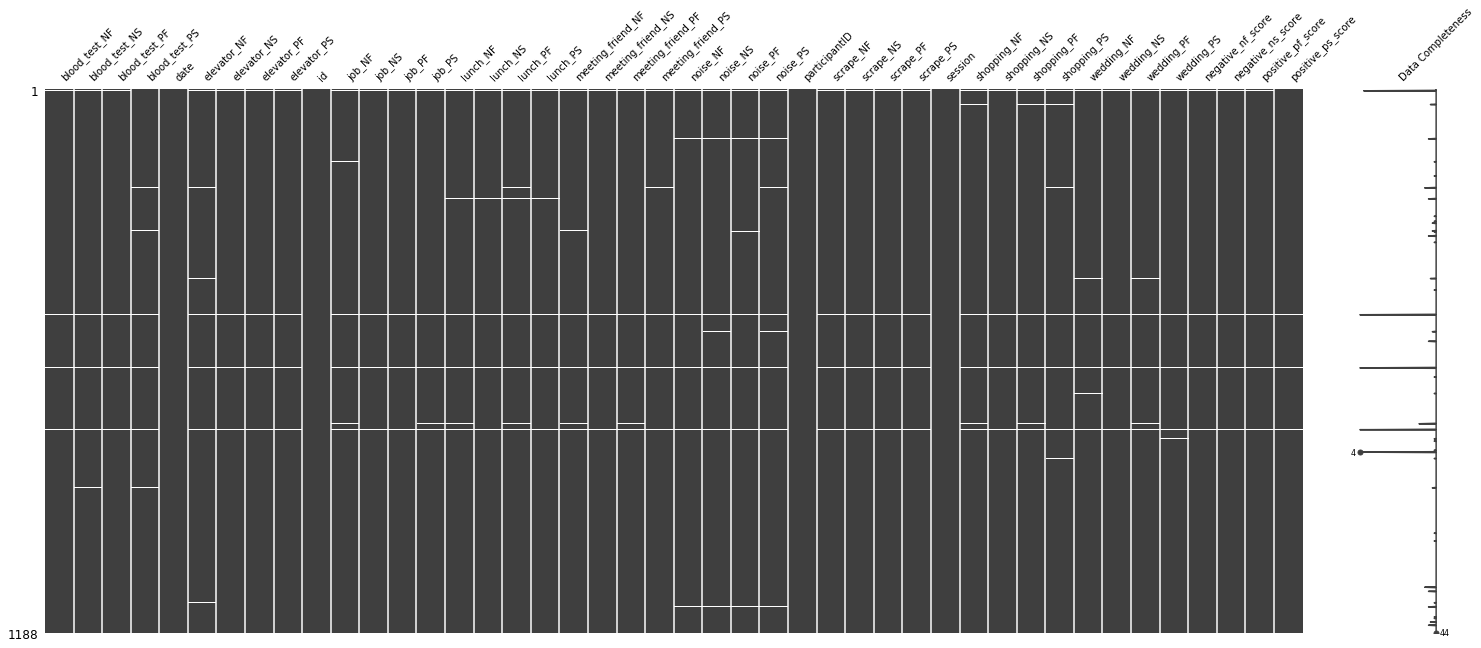

In [16]:
print("--------------------------------Section 3.3---------------------------------------------")
print("----------------------------------------------------------------------------------------")
print("----------------------------------------------------------------------------------------")
print("----------------------------Calculate RR psychometrics-----------------------------")
print("----------------------------------------------------------------------------------------")
print("")
## Get the latest entry for each participant
rr_analysis = rr_analysis.sort_values(by="date").groupby(['participantID','session']).tail(1)

# prefer not to answer is -1 
prefer_not_to_answer = -1
rr_analysis = rr_analysis.replace([prefer_not_to_answer], np.nan)

# imputer = sklearn.impute.SimpleImputer(strategy='most_frequent')
# impute_cols = set(rr_analysis.select_dtypes(include='number').columns) - {standard_id_name, 'id'}
# for col in impute_cols:
#     imputed = imputer.fit_transform(np.array(rr_analysis[col]).reshape(-1, 1))
#     rr_analysis[col] = imputed

# calculate psychometrics
rr_pf_clm = list(rr_analysis.filter(like='_PF', axis = 1).columns)
rr_nf_clm = list(rr_analysis.filter(like='_NF', axis = 1).columns)
rr_ps_clm = list(rr_analysis.filter(like='_PS', axis = 1).columns)
rr_ns_clm = list(rr_analysis.filter(like='_NS', axis = 1).columns)

rr_analysis['negative_nf_score'] = rr_analysis[rr_nf_clm].mean(axis = 1)
rr_analysis['negative_ns_score'] = rr_analysis[rr_ns_clm].mean(axis = 1)
rr_analysis['positive_pf_score'] = rr_analysis[rr_pf_clm].mean(axis = 1)
rr_analysis['positive_ps_score'] = rr_analysis[rr_ps_clm].mean(axis = 1)

# show the missing values in raw dataset
msno.matrix(rr_analysis, labels=True, fontsize= 10)

# select important columns
rr_analysis_new = rr_analysis[['participantID', 'session','negative_nf_score', 'negative_ns_score', 'positive_pf_score', 'positive_ps_score']]

# convert to wide format
rr_analysis_nf_wide = rr_analysis_new.pivot(index='participantID', columns='session', values='negative_nf_score')
rr_analysis_nf_wide = rr_analysis_nf_wide.add_prefix('negative_nf_score_')

rr_analysis_ns_wide = rr_analysis_new.pivot(index='participantID', columns='session', values='negative_ns_score')
rr_analysis_ns_wide = rr_analysis_ns_wide.add_prefix('negative_ns_score_')

rr_positive_pf_wide = rr_analysis_new.pivot(index='participantID', columns='session', values='positive_pf_score')
rr_positive_pf_wide = rr_positive_pf_wide.add_prefix('positive_pf_score_')

rr_analysis_ps_wide = rr_analysis_new.pivot(index='participantID', columns='session', values='positive_ps_score')
rr_analysis_ps_wide = rr_analysis_ps_wide.add_prefix('positive_ps_score_')

rr_analysis_wide = pd.concat([rr_analysis_nf_wide, rr_analysis_ns_wide, rr_positive_pf_wide,rr_analysis_ps_wide], axis = 1)

# adding dropout columns
score_clm = rr_analysis_wide.filter(like = "_score", axis = 1).columns
score_clm_dropout = [a + "_dropout" for a in score_clm]
for drop_col in score_clm_dropout:
    col = drop_col.split("_dropout")[0]
    rr_analysis_wide[drop_col] = rr_analysis_wide[col].apply(lambda x: 0 if math.isnan(x) else 1)

print("Number of unique participants in RR table {}: ".format(rr_analysis_wide.shape[0]))
rr_analysis_wide.describe()

#### 3.4 Calculate BBSIQ score
1. Physical_Score = [physical_list].mean/ [nonPhysical_list].mean
2. External_Threat_Score = [threat_list].mean/ [nonThreat_list].mean
3. Negative_Ave = [physical_list + threat_list].mean

*** one participant has duplicate values -- 1767

--------------------------------Section 3.4---------------------------------------------
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
----------------------------Calculate BBSIQ psychometrics-----------------------------
----------------------------------------------------------------------------------------

Number of unique participants in BBSIQ table 806: 


session,physical_score_POST,physical_score_PRE,physical_score_SESSION3,physical_score_SESSION6,physical_score_SESSION8,threat_score_POST,threat_score_PRE,threat_score_SESSION3,threat_score_SESSION6,threat_score_SESSION8,physical_score_POST_dropout,physical_score_PRE_dropout,physical_score_SESSION3_dropout,physical_score_SESSION6_dropout,physical_score_SESSION8_dropout,threat_score_POST_dropout,threat_score_PRE_dropout,threat_score_SESSION3_dropout,threat_score_SESSION6_dropout,threat_score_SESSION8_dropout
count,25.000000,799.000000,206.000000,115.000000,87.000000,25.000000,799.000000,206.000000,115.000000,86.000000,806.000000,806.000000,806.000000,806.000000,806.000000,806.000000,806.000000,806.000000,806.000000,806.000000
mean,0.529264,0.739100,0.556319,0.465856,0.430254,0.577425,0.738518,0.561862,0.512337,0.488473,0.031017,0.991315,0.255583,0.142680,0.107940,0.031017,0.991315,0.255583,0.142680,0.106700
std,0.467586,0.689302,0.468025,0.433166,0.406555,0.507729,0.554102,0.366890,0.362388,0.368333,0.173472,0.092845,0.436459,0.349963,0.310498,0.173472,0.092845,0.436459,0.349963,0.308923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.307692,0.222222,0.184659,0.125741,0.133333,0.387097,0.310769,0.256692,0.235294,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.461538,0.619048,0.458042,0.350000,0.320000,0.619048,0.642857,0.475973,0.451613,0.405882,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.740741,1.000000,0.808108,0.605556,0.558442,0.833333,0.962963,0.764423,0.720000,0.687054,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.793103,11.000000,3.384615,2.400000,1.777778,1.714286,8.000000,1.866667,1.833333,1.583333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


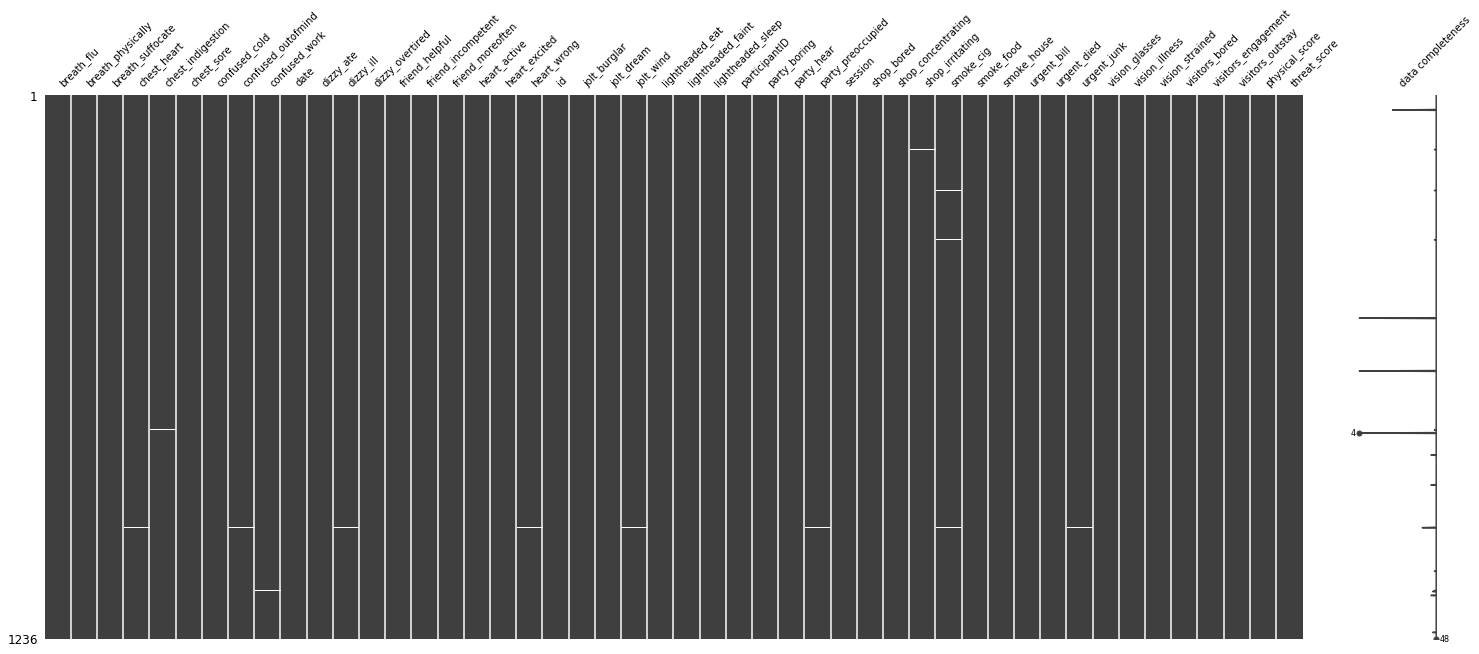

In [17]:
print("--------------------------------Section 3.4---------------------------------------------")
print("----------------------------------------------------------------------------------------")
print("----------------------------------------------------------------------------------------")
print("----------------------------Calculate BBSIQ psychometrics-----------------------------")
print("----------------------------------------------------------------------------------------")
print("")

## Get the latest entry for each participant
bbsiq_analysis = bbsiq_analysis.sort_values(by="date").groupby(['participantID','session']).tail(1)

# prefer not to answer is 555
prefer_not_to_answer = 555
bbsiq_analysis.loc[:, bbsiq_analysis.columns != 'participantID'] = bbsiq_analysis.loc[:, bbsiq_analysis.columns != 'participantID'].replace([prefer_not_to_answer], np.nan)

# calculate psychometrics
physical_list = ['breath_suffocate', 'chest_heart', 'confused_outofmind', 
               'dizzy_ill', 'heart_wrong', 'lightheaded_faint', 'vision_illness']

nonPhysical_list = ['breath_flu', 'breath_physically', 'vision_glasses', 
                  'vision_strained', 'lightheaded_eat', 'lightheaded_sleep', 
                  'chest_indigestion', 'chest_sore', 'heart_active', 'heart_excited', 
                  'confused_cold', 'confused_work', 'dizzy_ate', 'dizzy_overtired']

threat_list = ['visitors_bored', 'shop_irritating', 'smoke_house', 
               'friend_incompetent', 'jolt_burglar', 'party_boring', 'urgent_died']

nonThreat_list = ['visitors_engagement', 'visitors_outstay', 'shop_bored', 
                'shop_concentrating', 'smoke_cig', 'smoke_food', 'friend_helpful', 
                'friend_moreoften', 'jolt_dream', 'jolt_wind', 'party_hear', 
                'party_preoccupied','urgent_bill', 'urgent_junk']

bbsiq_analysis['physical_score'] = ((bbsiq_analysis[physical_list].mean(axis = 1))/ (bbsiq_analysis[nonPhysical_list].mean(axis = 1)))
bbsiq_analysis['threat_score'] = ((bbsiq_analysis[threat_list].mean(axis = 1))/ ((bbsiq_analysis[nonThreat_list].mean(axis = 1))))

# show the missing value in raw dataset
msno.matrix(bbsiq_analysis, labels=True, fontsize= 10)

# select important columns
bbsiq_analysis_new = bbsiq_analysis[['participantID', 'session','physical_score', 'threat_score']]

# convert to wide format
bbsiq_analysis_physicial_wide = bbsiq_analysis_new.pivot(index='participantID', columns='session', values='physical_score')
bbsiq_analysis_physicial_wide = bbsiq_analysis_physicial_wide.add_prefix('physical_score_')

bbsiq_analysis_threat_wide = bbsiq_analysis_new.pivot(index='participantID', columns='session', values='threat_score')
bbsiq_analysis_threat_wide = bbsiq_analysis_threat_wide.add_prefix('threat_score_')

bbsiq_analysis_wide = pd.concat([bbsiq_analysis_physicial_wide, bbsiq_analysis_threat_wide], axis = 1)


# adding dropout columns
score_clm = bbsiq_analysis_wide.filter(like = "_score", axis = 1).columns
score_clm_dropout = [a + "_dropout" for a in score_clm]
for drop_col in score_clm_dropout:
    col = drop_col.split("_dropout")[0]
    bbsiq_analysis_wide[drop_col] = bbsiq_analysis_wide[col].apply(lambda x: 0 if math.isnan(x) else 1)

print("Number of unique participants in BBSIQ table {}: ".format(bbsiq_analysis_wide.shape[0]))
bbsiq_analysis_wide.describe()


#### 3.5 Calculate OASIS score
1. oasis_score = sum('anxious_freq', 'anxious_sev', 'avoid', 'interfere','interfere_social')

*** 1767 has a duplicated values - PRE

--------------------------------Section 3.1---------------------------------------------
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
----------------------------Calculate OASIS psychometrics-----------------------------
----------------------------------------------------------------------------------------

Number of unique participants in OASIS table 810: 


session,oasis_score_POST,oasis_score_PRE,oasis_score_SESSION1,oasis_score_SESSION2,oasis_score_SESSION3,oasis_score_SESSION4,oasis_score_SESSION5,oasis_score_SESSION6,oasis_score_SESSION7,oasis_score_SESSION8,oasis_score_POST_dropout,oasis_score_PRE_dropout,oasis_score_SESSION1_dropout,oasis_score_SESSION2_dropout,oasis_score_SESSION3_dropout,oasis_score_SESSION4_dropout,oasis_score_SESSION5_dropout,oasis_score_SESSION6_dropout,oasis_score_SESSION7_dropout,oasis_score_SESSION8_dropout
count,26.000000,810.000000,606.000000,410.000000,221.000000,163.000000,136.000000,120.000000,106.000000,89.000000,810.000000,810.0,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000
mean,7.730769,10.877778,10.508251,9.717073,9.253394,8.815951,8.316176,8.341667,8.103774,8.550562,0.032099,1.0,0.748148,0.506173,0.272840,0.201235,0.167901,0.148148,0.130864,0.109877
std,4.143020,3.631156,3.639875,3.866090,3.994206,4.127952,4.061932,4.325993,4.298237,4.673453,0.176371,0.0,0.434345,0.500271,0.445694,0.401171,0.374009,0.355466,0.337460,0.312929
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,8.000000,8.000000,7.000000,6.000000,6.000000,5.000000,5.750000,5.000000,5.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,11.000000,10.000000,10.000000,9.000000,9.000000,8.000000,8.000000,8.000000,8.000000,0.000000,1.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10.750000,13.000000,13.000000,12.000000,12.000000,12.000000,11.000000,11.000000,11.000000,12.000000,0.000000,1.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,15.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


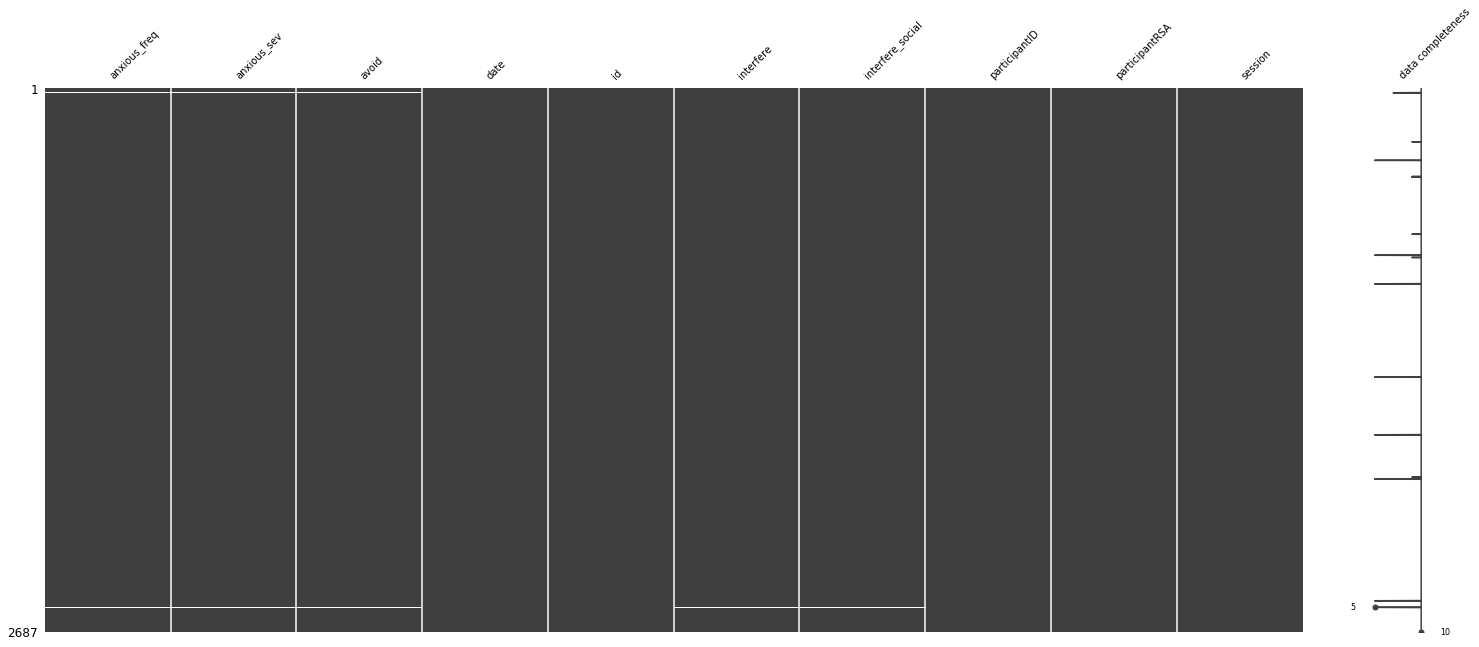

In [18]:
print("--------------------------------Section 3.1---------------------------------------------")
print("----------------------------------------------------------------------------------------")
print("----------------------------------------------------------------------------------------")
print("----------------------------Calculate OASIS psychometrics-----------------------------")
print("----------------------------------------------------------------------------------------")
print("")
## Get the latest entry for each participant
oasis_analysis = oasis_analysis.sort_values(by="date").groupby(['participantID','session']).tail(1)

# prefer not to answer is 555
prefer_not_to_answer = 555
oasis_analysis.loc[:, oasis_analysis.columns != 'participantID'] = oasis_analysis.loc[:, oasis_analysis.columns != 'participantID'].replace([prefer_not_to_answer], np.nan)

# show the missing values in raw dataset
msno.matrix(oasis_analysis, labels=True, fontsize= 10)

# calculate psychometrics
oasis_clm = ['anxious_freq', 'anxious_sev', 'avoid', 'interfere','interfere_social']
oasis_analysis['oasis_score'] = oasis_analysis[oasis_clm].sum(axis = 1)

# select important columns
oasis_analysis_new = oasis_analysis[['participantID', 'session','oasis_score']]

# convert to wide format
oasis_analysis_wide = oasis_analysis_new.pivot(index='participantID', columns='session', values='oasis_score')

# add a prefix
oasis_analysis_wide = oasis_analysis_wide.add_prefix('oasis_score_')

# adding dropout columns
score_clm = oasis_analysis_wide.filter(like = "_score", axis = 1).columns
score_clm_dropout = [a + "_dropout" for a in score_clm]
for drop_col in score_clm_dropout:
    col = drop_col.split("_dropout")[0]
    oasis_analysis_wide[drop_col] = oasis_analysis_wide[col].apply(lambda x: 0 if math.isnan(x) else 1)

print("Number of unique participants in OASIS table {}: ".format(oasis_analysis_wide.shape[0]))
oasis_analysis_wide.describe()


#### 3.6 Creat Demographic Data
1. revise the birthYear of the participant
2. Get the age of the participant
3. revise the empoloyment status
4. revise the martial status 
5. revise the education
6. revise the ethnicity
7. revise the income
8. revise the race

*** participant 1767 had a duplicated values

--------------------------------Section 3.6---------------------------------------------
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
------------------------------Get Relevant Demographic Data-----------------------------
----------------------------------------------------------------------------------------

Number of unique participants in Demographics table 810: 


,participantID,age,birthYear
count,810.000000,796.000000,796.00000
mean,1178.361728,33.709799,1983.21608
std,469.983737,13.716719,13.85245
min,8.000000,18.000000,1900.00000
25%,788.250000,23.000000,1975.00000
50%,1172.000000,30.000000,1987.00000
75%,1585.500000,41.250000,1994.00000
max,1972.000000,116.000000,2000.00000


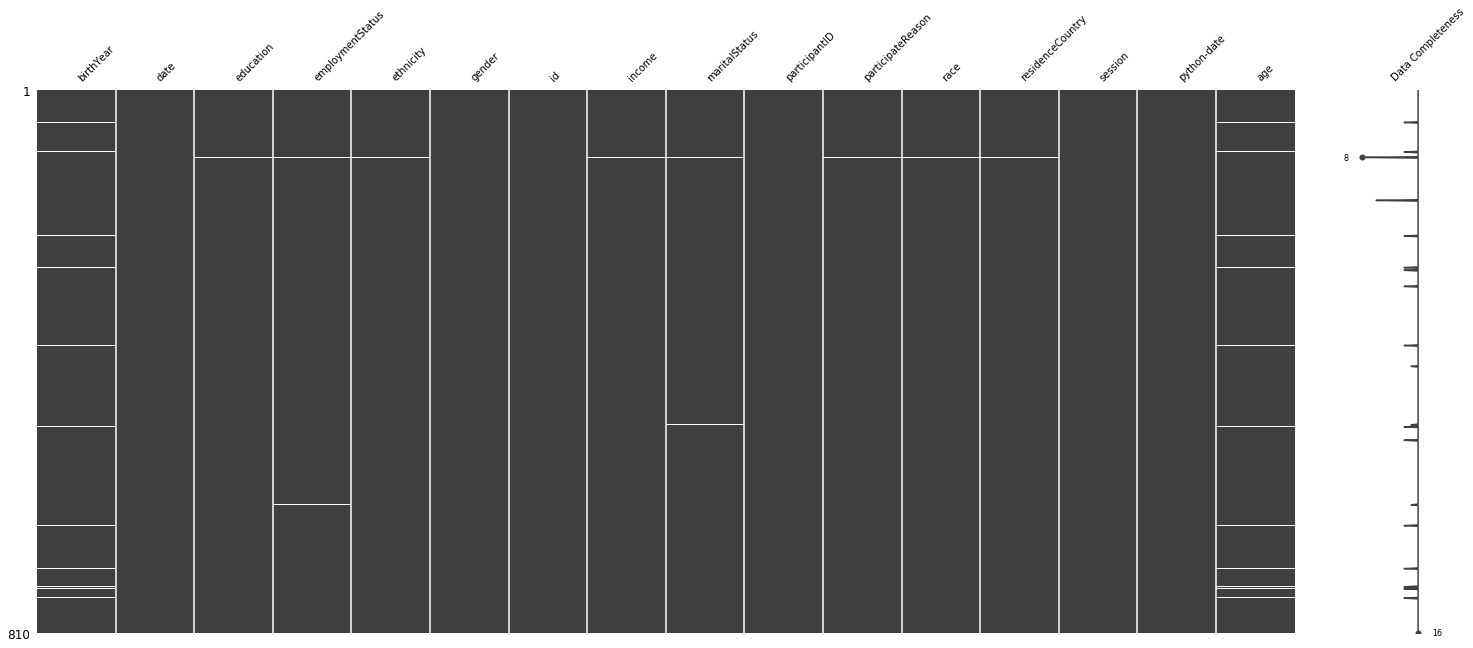

In [19]:
print("--------------------------------Section 3.6---------------------------------------------")
print("----------------------------------------------------------------------------------------")
print("----------------------------------------------------------------------------------------")
print("------------------------------Get Relevant Demographic Data-----------------------------")
print("----------------------------------------------------------------------------------------")
print("")
## Get the latest entry for each participant
demographics_analysis = demographics_analysis.sort_values(by="date").groupby(['participantID','session']).tail(1)

# edit the participant birth Year
yearMap = {1975:19001975 , 2222:2222,
           1997:19001997, 1977:19001977, 
           1959:19001959, 1951:195100,
           1976:19001976, 1955:1900955,
           1989:19001989, 1981:19001981,
           1959:19019590, 1972:1972900, 
           1987:19001987, 1961:61,
           1989:89, 1980:80, 1964:64,
           1977:77, 1987:87, 1992:92,
           1981:81, 1982:82}
demographics_analysis.loc[demographics_analysis.birthYear == 0,'birthYear'] = np.nan
demographics_analysis.loc[demographics_analysis.birthYear >= (yearMap[2222]),'birthYear'] = np.nan
demographics_analysis.loc[demographics_analysis.birthYear == (yearMap[1975]),'birthYear'] = 1975
demographics_analysis.loc[demographics_analysis.birthYear == (yearMap[1997]),'birthYear'] = 1997
demographics_analysis.loc[demographics_analysis.birthYear == (yearMap[1977]),'birthYear'] = 1977
demographics_analysis.loc[demographics_analysis.birthYear == (yearMap[1959]),'birthYear'] = 1959
demographics_analysis.loc[demographics_analysis.birthYear == (yearMap[1951]),'birthYear'] = 1951
demographics_analysis.loc[demographics_analysis.birthYear == (yearMap[1976]),'birthYear'] = 1976
demographics_analysis.loc[demographics_analysis.birthYear == (yearMap[1955]),'birthYear'] = 1955
demographics_analysis.loc[demographics_analysis.birthYear == (yearMap[1989]),'birthYear'] = 1989
demographics_analysis.loc[demographics_analysis.birthYear == (yearMap[1981]),'birthYear'] = 1981
demographics_analysis.loc[demographics_analysis.birthYear == (yearMap[1959]),'birthYear'] = 1959
demographics_analysis.loc[demographics_analysis.birthYear == (yearMap[1972]),'birthYear'] = 1972
demographics_analysis.loc[demographics_analysis.birthYear == (yearMap[1987]),'birthYear'] = 1987
demographics_analysis.loc[demographics_analysis.birthYear == (yearMap[1961]),'birthYear'] = 1961
demographics_analysis.loc[demographics_analysis.birthYear == (yearMap[1989]),'birthYear'] = 1989
demographics_analysis.loc[demographics_analysis.birthYear == (yearMap[1980]),'birthYear'] = 1980
demographics_analysis.loc[demographics_analysis.birthYear == (yearMap[1964]),'birthYear'] = 1964
demographics_analysis.loc[demographics_analysis.birthYear == (yearMap[1977]),'birthYear'] = 1977
demographics_analysis.loc[demographics_analysis.birthYear == (yearMap[1987]),'birthYear'] = 1987
demographics_analysis.loc[demographics_analysis.birthYear == (yearMap[1992]),'birthYear'] = 1992
demographics_analysis.loc[demographics_analysis.birthYear == (yearMap[1981]),'birthYear'] = 1981
demographics_analysis.loc[demographics_analysis.birthYear == (yearMap[1982]),'birthYear'] = 1982

# add age column to the data
demographics_analysis['python-date'] = pd.to_datetime(demographics_analysis['date'])
demographics_analysis['age'] = [a.year for a in demographics_analysis['python-date']] - demographics_analysis['birthYear']

# edit the employment status
demographics_analysis.loc[demographics_analysis.employmentStatus == "????" , 'employmentStatus'] = np.nan
demographics_analysis.loc[demographics_analysis.employmentStatus == 'Étudiant', 'employmentStatus' ] = 'Student'
demographics_analysis.loc[demographics_analysis.employmentStatus == 'Lavoro part-time', 'employmentStatus' ] = 'Working part-time'

# edit the ethnicity
demographics_analysis.loc[demographics_analysis.ethnicity == "??????????", 'ethnicity'] = np.nan
demographics_analysis.loc[demographics_analysis.ethnicity == 'Inconnu', 'ethnicity'] = "Unknown"
demographics_analysis.loc[demographics_analysis.ethnicity == 'Sconosciuto', 'ethnicity'] = "Unknown"

# edit gender
demographics_analysis.loc[demographics_analysis.gender == "?", 'gender'] = np.nan
demographics_analysis.loc[demographics_analysis.gender == "Femmina", 'gender'] = "Female"
demographics_analysis.loc[demographics_analysis.gender == "Mâle", 'gender'] = "Male"

# edit income
demographics_analysis.loc[demographics_analysis.income == "$ 5,000 a $ 11999", 'income'] =  "$5,000 through $11,999"
demographics_analysis.loc[demographics_analysis.income == "$ 50,000??$ 74,999", 'income'] =  "$50,000 through $74,999"
demographics_analysis.loc[demographics_analysis.income == "Moins de 5 000 $", 'income'] = "Less than $5,000"

# edit martialStatus
demographics_analysis.loc[demographics_analysis.maritalStatus == "??", 'maritalStatus'] = np.nan
demographics_analysis.loc[demographics_analysis.maritalStatus == "Single, ma attualmente fidanzato", 'maritalStatus'] = "Single, but currently engaged to be married"
demographics_analysis.loc[demographics_analysis.maritalStatus == "Unique", 'maritalStatus'] = "Single"

# edit participateReason
demographics_analysis.loc[demographics_analysis.participateReason == "??????????????", 'participateReason'] = np.nan
demographics_analysis.loc[demographics_analysis.participateReason == "Basta navigare sul web", 'participateReason'] = "Just surfing the web"
demographics_analysis.loc[demographics_analysis.participateReason == "Lien depuis un blog, un chat ou un fil de discussion", 'participateReason'] = "Link from blog, chat, or discussion thread"

# edit race
demographics_analysis.loc[demographics_analysis.race == "?/????", 'race'] = np.nan
demographics_analysis.loc[demographics_analysis.race == "Bianco / origine europea", 'race'] = "White/European origin"
demographics_analysis.loc[demographics_analysis.race == "Blanc / origine européenne", 'race'] = "White/European origin"


demographics_analysis_wide = demographics_analysis[['participantID', 'age', 'birthYear', 'education', 'employmentStatus', 'ethnicity',
                                                    'gender', 'income', 'maritalStatus', 'race', 
                                                    'residenceCountry']]

# show the missing values in raw data
msno.matrix(demographics_analysis, labels=True, fontsize= 10)

print("Number of unique participants in Demographics table {}: ".format(demographics_analysis_wide.shape[0]))
demographics_analysis_wide.describe()


#### 3.7 Creat Participant Data

In [23]:
print("--------------------------------Section 3.7---------------------------------------------")
print("----------------------------------------------------------------------------------------")
print("----------------------------------------------------------------------------------------")
print("------------------------------Get Relevant Participant Data-----------------------------")
print("----------------------------------------------------------------------------------------")
print("")
# get the important columns from participant table
participant_analysis_wide = participant_analysis[['participantID', 'cbm_condition', 'prime']]

print("Number of unique participants in Demographics table {}: ".format(participant_analysis_wide.shape[0]))
participant_analysis_wide.head()

--------------------------------Section 3.7---------------------------------------------
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
------------------------------Get Relevant Participant Data-----------------------------
----------------------------------------------------------------------------------------

Number of unique participants in Demographics table 810: 


,participantID,cbm_condition,prime
0,8,FIFTY_FIFTY,ANXIETY
1,9,NEUTRAL,ANXIETY
2,10,FIFTY_FIFTY,NEUTRAL
3,11,NEUTRAL,NEUTRAL
4,12,NEUTRAL,NEUTRAL


## 4. Create a table that has all the information

In [34]:
print("--------------------------------Section 4---------------------------------------------")
print("----------------------------------------------------------------------------------------")
print("----------------------------------------------------------------------------------------")
print("------------------------------One Table with all Infomation-----------------------------")
print("----------------------------------------------------------------------------------------")
print("")
all_table_data = pd.DataFrame(index=pd.Index(analysisIDs, name=standard_id_name))

cols = {}

table_name = "participant"
feat_df = participant_analysis_wide
for col_name in set(feat_df.columns) - {standard_id_name,}:
    df = feat_df.loc[:, [standard_id_name, col_name]].set_index(standard_id_name)
    cols[table_name + "_" + col_name] = df
    
table_name = "demographic"
feat_df = demographics_analysis_wide
for col_name in set(feat_df.columns) - {standard_id_name,}:
    df = feat_df.loc[:, [standard_id_name, col_name]].set_index(standard_id_name)
    cols[table_name + "_" + col_name] = df
    
table_name = "dass_as"
feat_df = dass_as_analysis_wide.reset_index()
for col_name in set(feat_df.columns) - {standard_id_name, 'session'}:
    df = feat_df.loc[:, [standard_id_name, col_name]].set_index(standard_id_name)
    cols[col_name] = df
    
table_name = "dass_ds"
feat_df = dass_ds_analysis_wide.reset_index()
for col_name in set(feat_df.columns) - {standard_id_name,'session'}:
    df = feat_df.loc[:, [standard_id_name, col_name]].set_index(standard_id_name)
    cols[col_name] = df
    
table_name = "oasis"
feat_df = oasis_analysis_wide.reset_index()
for col_name in set(feat_df.columns) - {standard_id_name,'session'}:
    df = feat_df.loc[:, [standard_id_name, col_name]].set_index(standard_id_name)
    cols[col_name] = df

table_name = "RR"
feat_df = rr_analysis_wide.reset_index()
for col_name in set(feat_df.columns) - {standard_id_name, 'session'}:
    df = feat_df.loc[:, [standard_id_name, col_name]].set_index(standard_id_name)
    cols[table_name + "_" + col_name] = df

table_name = "bbsiq"
feat_df = bbsiq_analysis_wide.reset_index()
for col_name in set(feat_df.columns) - {standard_id_name,'session'}:
    df = feat_df.loc[:, [standard_id_name, col_name]].set_index(standard_id_name)
    cols[table_name + "_" + col_name] = df
    
final_data = all_table_data.assign(**cols)
final_data.describe()

--------------------------------Section 4---------------------------------------------
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
------------------------------One Table with all Infomation-----------------------------
----------------------------------------------------------------------------------------



,demographic_age,demographic_birthYear,dass_as_score_SESSION8,dass_as_score_ELIGIBLE,dass_as_score_ELIGIBLE_dropout,dass_as_score_POST,dass_as_score_SESSION8_dropout,dass_as_score_POST_dropout,dass_ds_score_SESSION8,dass_ds_score_SESSION3,...,bbsiq_physical_score_SESSION8_dropout,bbsiq_threat_score_POST_dropout,bbsiq_physical_score_PRE,bbsiq_threat_score_PRE_dropout,bbsiq_physical_score_SESSION6,bbsiq_threat_score_SESSION8_dropout,bbsiq_threat_score_SESSION6,bbsiq_threat_score_SESSION3,bbsiq_physical_score_SESSION8,bbsiq_threat_score_PRE
count,796.000000,796.00000,89.000000,801.000000,810.000000,26.000000,810.000000,810.000000,88.000000,205.000000,...,806.000000,806.000000,799.000000,806.000000,115.000000,806.000000,115.000000,206.000000,87.000000,799.000000
mean,33.709799,1983.21608,14.516854,23.153558,0.988889,13.384615,0.109877,0.032099,14.431818,15.736585,...,0.107940,0.031017,0.739100,0.991315,0.465856,0.106700,0.512337,0.561862,0.430254,0.738518
std,13.716719,13.85245,9.197470,7.966658,0.104887,9.596153,0.312929,0.176371,11.738330,10.468856,...,0.310498,0.173472,0.689302,0.092845,0.433166,0.308923,0.362388,0.366890,0.406555,0.554102
min,18.000000,1900.00000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1975.00000,8.000000,16.000000,1.000000,6.500000,0.000000,0.000000,5.500000,8.000000,...,0.000000,0.000000,0.307692,1.000000,0.184659,0.000000,0.256692,0.310769,0.125741,0.387097
50%,30.000000,1987.00000,14.000000,22.000000,1.000000,12.000000,0.000000,0.000000,12.000000,14.000000,...,0.000000,0.000000,0.619048,1.000000,0.350000,0.000000,0.451613,0.475973,0.320000,0.642857
75%,41.250000,1994.00000,20.000000,28.000000,1.000000,17.500000,0.000000,0.000000,22.000000,22.000000,...,0.000000,0.000000,1.000000,1.000000,0.605556,0.000000,0.720000,0.764423,0.558442,0.962963
max,116.000000,2000.00000,40.000000,42.000000,1.000000,42.000000,1.000000,1.000000,42.000000,42.000000,...,1.000000,1.000000,11.000000,1.000000,2.400000,1.000000,1.833333,1.866667,1.777778,8.000000


#### 4.1 Final Data Description

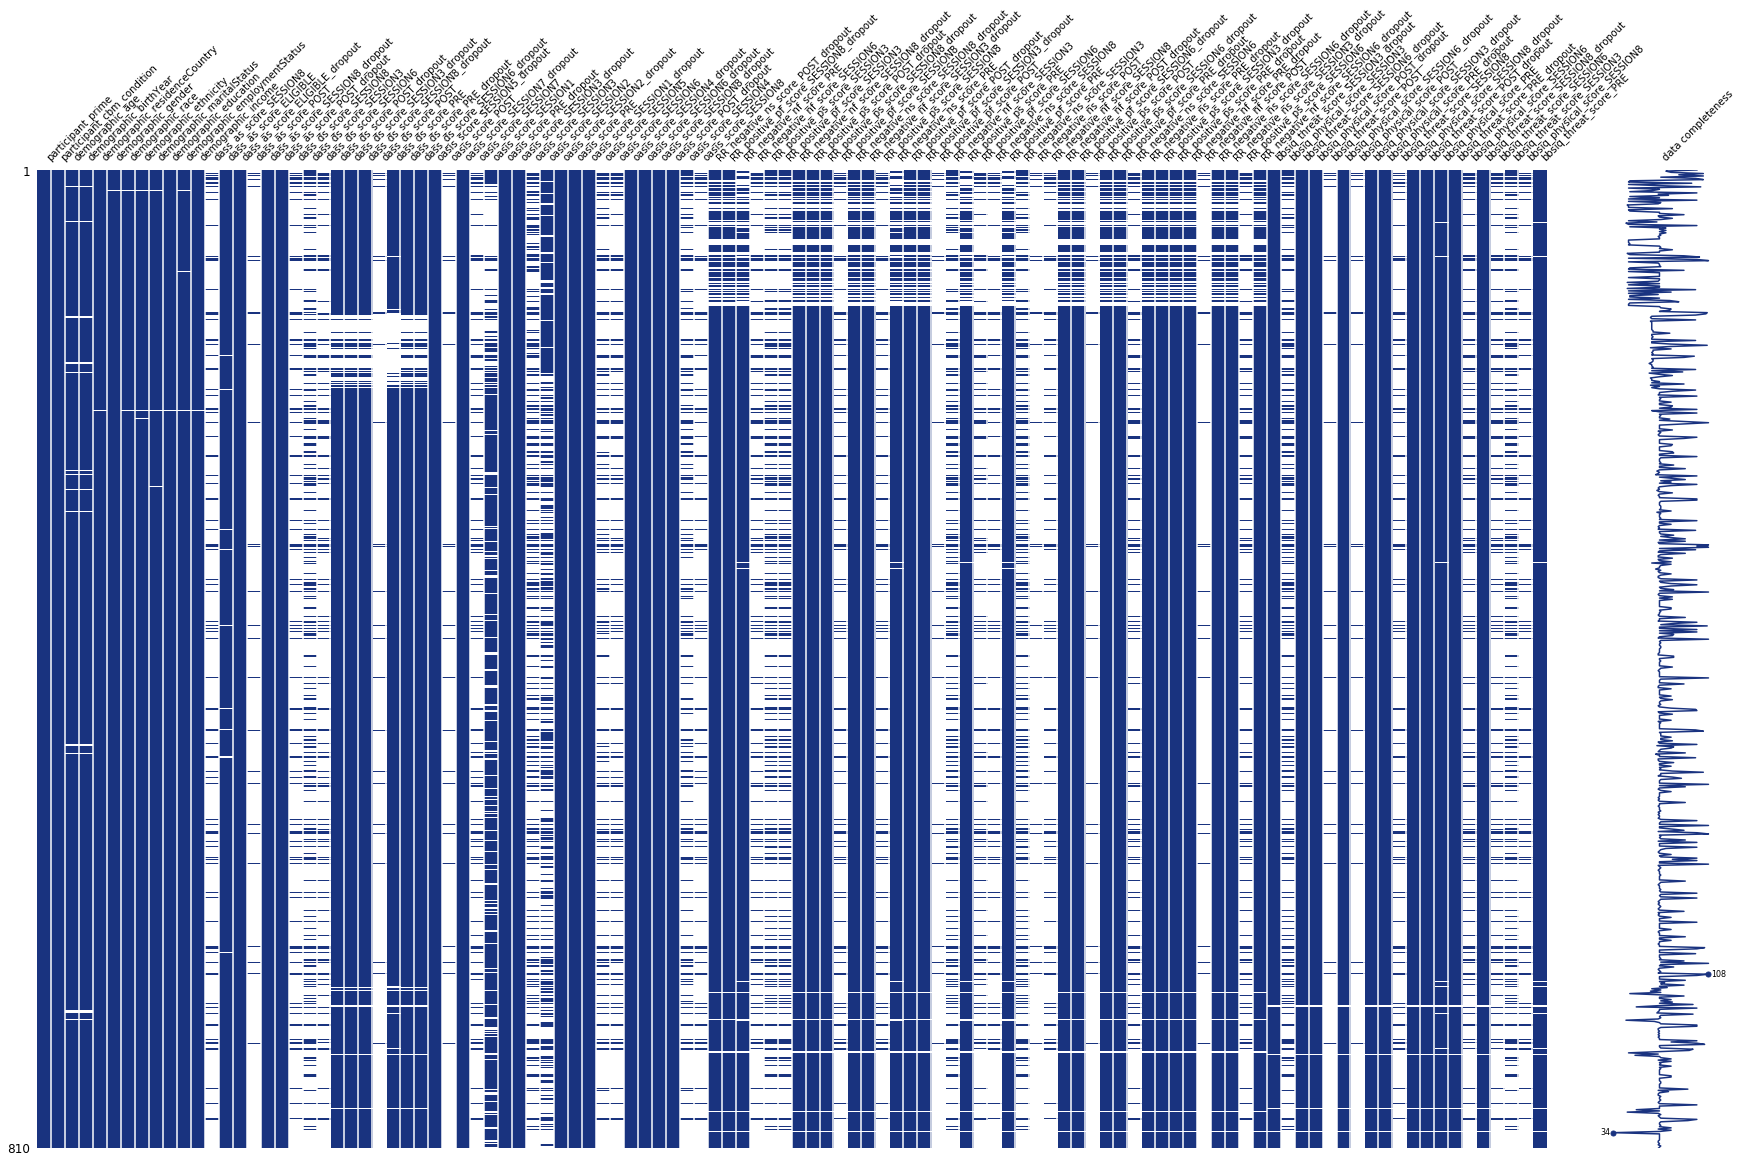

In [44]:
msno.matrix(final_data, labels=True, fontsize= 10, figsize=(30,18), color=(0.1, 0.2, 0.5))

###  5. Data saving

In [46]:
final_data.to_csv("FinalData-28Feb20.csv")